In [9]:
import os
import scipy.io
import csv
import pandas as pd 

In [47]:

models_folder = 'models'

model_data = []


In [48]:

for i in range(1, 2212):  
    model_filename = f'msp_{i:04d}.mat'
    model_path = os.path.join(models_folder, model_filename)
    
    if os.path.isfile(model_path):
        # Load the .mat file and extract the species name
        try:
            mat_contents = scipy.io.loadmat(model_path)
            species_name = mat_contents['model']['modelName'][0][0][0]
        except KeyError:
            # If 'modelName' is not present, use the original model name
            species_name = model_filename
    else:
        # If the model file is not present, use the original model name
        species_name = model_filename
    
    # Append the model name and species name to the list
    model_data.append([model_filename, species_name])

# Write the model names and species names to a CSV file in two columns
with open('species_names.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile, delimiter=';')
    csv_writer.writerow(['Model Name', 'Species Name'])  # Header row
    for index, row in model_data:
        csv_writer.writerow([index, row])

print("Species names have been extracted and saved to species_names.csv")

Species names have been extracted and saved to species_names.csv


In [49]:
df = pd.read_csv('species_names.csv', delimiter=';', names=['Model Name', 'Species Name'], skiprows=1)
print(df)

        Model Name                  Species Name
0     msp_0001.mat                  msp_0001.mat
1     msp_0002.mat                  msp_0002.mat
2     msp_0003.mat  Bacteroides_cellulosilyticus
3     msp_0004.mat                  msp_0004.mat
4     msp_0005.mat              Escherichia_coli
...            ...                           ...
2206  msp_2207.mat                  msp_2207.mat
2207  msp_2208.mat                  msp_2208.mat
2208  msp_2209.mat   unclassified_Succinatimonas
2209  msp_2210.mat                  msp_2210.mat
2210  msp_2211.mat     unclassified_Ruminococcus

[2211 rows x 2 columns]


In [50]:
df['Species Name']

0                       msp_0001.mat
1                       msp_0002.mat
2       Bacteroides_cellulosilyticus
3                       msp_0004.mat
4                   Escherichia_coli
                    ...             
2206                    msp_2207.mat
2207                    msp_2208.mat
2208     unclassified_Succinatimonas
2209                    msp_2210.mat
2210       unclassified_Ruminococcus
Name: Species Name, Length: 2211, dtype: object

In [51]:
df1 = pd.read_csv('vect_atlas.csv', header = 0)
print(df1)

     Unnamed: 0     DRS087519     DRS087520  DRS087521     DRS087522  \
0      msp_0001  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   
1      msp_0002  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   
2      msp_0003  0.000000e+00  7.041625e-08   0.000024  6.538314e-08   
3      msp_0004  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   
4      msp_0005  1.445833e-05  1.017152e-05   0.000000  1.382547e-07   
...         ...           ...           ...        ...           ...   
1985   msp_2196  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   
1986   msp_2207  9.262575e-08  0.000000e+00   0.000000  0.000000e+00   
1987   msp_2209  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   
1988   msp_2210  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   
1989   msp_2211  0.000000e+00  0.000000e+00   0.000000  0.000000e+00   

         DRS087523     DRS087524     DRS087525     DRS087526     DRS087527  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e

In [52]:
specific_row = df.iloc[1] 
specific_row

Model Name      msp_0002.mat
Species Name    msp_0002.mat
Name: 1, dtype: object

In [53]:
df1.rename(columns={df1.columns[0]: 'microorganism'}, inplace=True)
df1['microorganism'] = df['Species Name']
df1

,microorganism,DRS087519,DRS087520,DRS087521,DRS087522,DRS087523,DRS087524,DRS087525,DRS087526,DRS087527,...,SRS4597854,SRS4597853,SRS4597852,SRS4597851,SRS4597850,SRS4597849,SRS4597848,SRS4597847,SRS4597846,SRS4597845
0,msp_0001.mat,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
1,msp_0002.mat,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
2,Bacteroides_cellulosilyticus,0.000000e+00,7.041625e-08,0.000024,6.538314e-08,8.276546e-07,0.000000e+00,0.000000e+00,9.880345e-08,9.633779e-07,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,5.468583e-08,0.00000,0.000000,0.000000,0.000000
3,msp_0004.mat,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
4,Escherichia_coli,1.445833e-05,1.017152e-05,0.000000,1.382547e-07,3.320195e-08,2.652268e-07,5.407278e-07,1.192738e-06,1.086083e-05,...,6.852405e-08,6.916649e-08,0.000019,0.000009,0.000104,1.536167e-06,0.00004,0.000044,0.000028,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,msp_1986.mat,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
1986,unclassified_Muribaculaceae,9.262575e-08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
1987,msp_1988.mat,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
1988,unclassified_Bacteroidales,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000


In [79]:
df2 = pd.read_csv('sampleID.csv')
df2_short= df2.loc[:, ['sample.ID', 'Age', 'Gender', 'BMI', 'Disease']]
df2_short['Disease'].unique()

array(['CRC', 'Healthy', 'Adenoma', 'CD', 'GDM', 'ACVD', 'LC', 'RA',
       'VKH', 'SPA', 'T2D', 'BD', 'NAFLD', 'UC', 'T1D', 'NSCLC', 'RCC',
       'PD', 'IGT', 'NGT', 'atherosclerosis', 'ME/CFS', 'melanoma'],
      dtype=object)

In [81]:
disease_counts = df2_short['Disease'].value_counts()
disease_counts

Healthy            3268
CRC                 662
T2D                 372
ACVD                214
LC                  213
Adenoma             183
NAFLD               159
RA                  135
NSCLC               118
RCC                 101
SPA                  97
VKH                  83
CD                   71
ME/CFS               50
IGT                  49
T1D                  46
melanoma             44
NGT                  43
PD                   31
BD                   24
UC                   21
GDM                  18
atherosclerosis      12
Name: Disease, dtype: int64

In [100]:
df2_filtered = df2_short[df2_short['Disease'].isin(['CRC', 'Healthy'])]
df_encoded = pd.get_dummies(df2_filtered, columns=['Gender', 'Disease'])
df_encoded = df_encoded.drop(columns=['Gender_Female', 'Disease_Healthy'])
df_encoded 


,sample.ID,Age,BMI,Gender_Male,Disease_CRC
0,ERS608599,64.0,29.0,1,1
1,ERS608499,68.0,32.0,1,0
2,ERS608489,60.0,22.0,0,0
4,ERS608521,68.0,23.0,1,0
5,ERS608508,66.0,30.0,1,0
...,...,...,...,...,...
6009,SRS149244,NaN,NaN,1,0
6010,SRS149325,NaN,NaN,0,0
6011,SRS149784,NaN,NaN,0,0
6012,SRS149879,NaN,NaN,0,0


In [101]:
abundance_df = df1.set_index('microorganism').transpose().reset_index()
abundance_df.rename(columns={'index': 'sample.ID'}, inplace=True)

abundance_df

microorganism,sample.ID,msp_0001.mat,msp_0002.mat,Bacteroides_cellulosilyticus,msp_0004.mat,Escherichia_coli,msp_0006.mat,Bacteroides_ovatus,Bacteroides_intestinalis,[Clostridium]_bolteae,...,Prevotella_sp._UBA7263_&_UBA7283_&_RUG423_&_RUG136_&_RUG144,unclassified_Bacteroides,unclassified_Prevotella,unclassified_Muribaculaceae,unclassified_Ruminococcus,msp_1986.mat,unclassified_Muribaculaceae,msp_1988.mat,unclassified_Bacteroidales,msp_1990.mat
0,DRS087519,0.0,0.0,0.000000e+00,0.0,1.445833e-05,0.0,2.207703e-06,0.000000e+00,3.475366e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,9.262575e-08,0.0,0.0,0.0
1,DRS087520,0.0,0.0,7.041625e-08,0.0,1.017152e-05,0.0,9.057479e-08,0.000000e+00,1.164234e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,DRS087521,0.0,0.0,2.414685e-05,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3.902975e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,DRS087522,0.0,0.0,6.538314e-08,0.0,1.382547e-07,0.0,1.204665e-06,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,DRS087523,0.0,0.0,8.276546e-07,0.0,3.320195e-08,0.0,1.451805e-07,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,SRS4597849,0.0,0.0,5.468583e-08,0.0,1.536167e-06,0.0,2.503302e-07,4.693515e-08,5.341717e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
6010,SRS4597848,0.0,0.0,0.000000e+00,0.0,3.999817e-05,0.0,1.151253e-06,1.022843e-07,6.696526e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
6011,SRS4597847,0.0,0.0,0.000000e+00,0.0,4.427926e-05,0.0,9.177307e-07,0.000000e+00,5.392784e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
6012,SRS4597846,0.0,0.0,0.000000e+00,0.0,2.773515e-05,0.0,3.957517e-07,1.165911e-06,6.622935e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [102]:
# Merge metadata and abundance data on 'sample.ID'
combined_df = pd.merge(df_encoded, abundance_df, on='sample.ID', how='inner')

combined_df

,sample.ID,Age,BMI,Gender_Male,Disease_CRC,msp_0001.mat,msp_0002.mat,Bacteroides_cellulosilyticus,msp_0004.mat,Escherichia_coli,...,Prevotella_sp._UBA7263_&_UBA7283_&_RUG423_&_RUG136_&_RUG144,unclassified_Bacteroides,unclassified_Prevotella,unclassified_Muribaculaceae,unclassified_Ruminococcus,msp_1986.mat,unclassified_Muribaculaceae,msp_1988.mat,unclassified_Bacteroidales,msp_1990.mat
0,ERS608599,64.0,29.0,1,1,0.0,0.0,0.000000e+00,0.0,1.175579e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERS608499,68.0,32.0,1,0,0.0,0.0,1.014641e-06,0.0,3.947260e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERS608489,60.0,22.0,0,0,0.0,0.0,0.000000e+00,0.0,1.017420e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERS608521,68.0,23.0,1,0,0.0,0.0,0.000000e+00,0.0,3.091635e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ERS608508,66.0,30.0,1,0,0.0,0.0,3.312954e-08,0.0,3.575061e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,SRS149244,NaN,NaN,1,0,0.0,0.0,0.000000e+00,0.0,2.069609e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3926,SRS149325,NaN,NaN,0,0,0.0,0.0,3.466060e-06,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3927,SRS149784,NaN,NaN,0,0,0.0,0.0,0.000000e+00,0.0,4.115812e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3928,SRS149879,NaN,NaN,0,0,0.0,0.0,1.441844e-07,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:

# Export to CSV
combined_df.to_csv('combined_dataset.csv', index=False)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler

In [121]:
df = pd.read_csv('combined_dataset.csv')
df.drop(columns=['sample.ID'], inplace=True)
df = df.dropna()
df

,Age,BMI,Gender_Male,Disease_CRC,msp_0001.mat,msp_0002.mat,Bacteroides_cellulosilyticus,msp_0004.mat,Escherichia_coli,msp_0006.mat,...,Prevotella_sp._UBA7263_&_UBA7283_&_RUG423_&_RUG136_&_RUG144,unclassified_Bacteroides.27,unclassified_Prevotella.23,unclassified_Muribaculaceae.22,unclassified_Ruminococcus.11,msp_1986.mat,unclassified_Muribaculaceae.23,msp_1988.mat,unclassified_Bacteroidales.10,msp_1990.mat
0,64.0,29.0,1,1,0.0,0.0,0.000000e+00,0.0,1.175579e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68.0,32.0,1,0,0.0,0.0,1.014641e-06,0.0,3.947260e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,22.0,0,0,0.0,0.0,0.000000e+00,0.0,1.017420e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,23.0,1,0,0.0,0.0,0.000000e+00,0.0,3.091635e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66.0,30.0,1,0,0.0,0.0,3.312954e-08,0.0,3.575061e-07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,18.0,20.0,0,0,0.0,0.0,1.308260e-08,0.0,4.919413e-07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3912,18.0,20.0,0,0,0.0,0.0,1.358657e-08,0.0,5.730150e-07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3915,32.0,28.0,0,0,0.0,0.0,6.847428e-06,0.0,3.398932e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916,32.0,28.0,0,0,0.0,0.0,7.324081e-06,0.0,3.057250e-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
X = df.drop(columns=['Disease_CRC'])
y = df['Disease_CRC']

In [123]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[0.59047619, 0.41428571, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.62857143, 0.45714286, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55238095, 0.31428571, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.34285714, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [125]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       712
           1       0.81      0.39      0.52       192

    accuracy                           0.85       904
   macro avg       0.83      0.68      0.72       904
weighted avg       0.85      0.85      0.83       904


Confusion Matrix:
[[695  17]
 [118  74]]


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [144]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1],  # Handling imbalance by giving more weight to the minority class
    'random_state': 42,
    'n_estimators': 100
}

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train_smote, y_train_smote)


y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       712
           1       0.73      0.68      0.70       192

    accuracy                           0.88       904
   macro avg       0.82      0.80      0.81       904
weighted avg       0.87      0.88      0.88       904


Confusion Matrix:
[[663  49]
 [ 62 130]]


                              Feature  Importance
1228                     msp_1226.mat    0.059590
0                                 Age    0.026865
46             Hungatella_hathewayi_1    0.023017
1756                     msp_1754.mat    0.022488
365                 Bacteroides_cutis    0.022137
...                               ...         ...
866                      msp_0864.mat    0.000000
865   unclassified_Lachnospiraceae.25    0.000000
864    unclassified_Muribaculaceae.10    0.000000
863      unclassified_Oscillibacter.8    0.000000
1992                     msp_1990.mat    0.000000

[1993 rows x 2 columns]


<Figure size 1000x800 with 0 Axes>

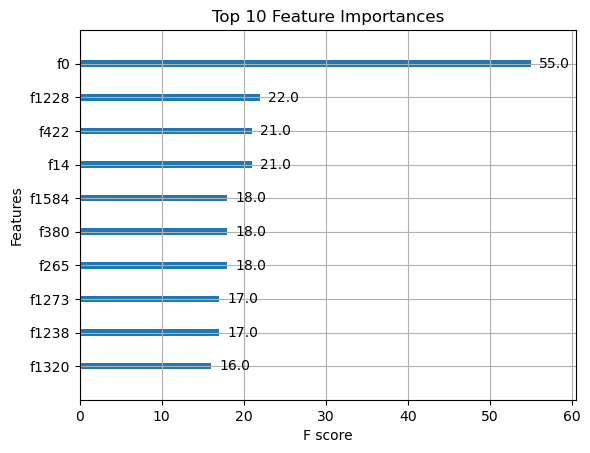

In [145]:
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Feature Importance
# Convert feature names for better display
feature_names = df.drop(columns=['Disease_CRC']).columns

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(importance_df)

# Plot feature importance using XGBoost's built-in function
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10, importance_type='weight', title="Top 10 Feature Importances")
plt.show()


In [153]:
importance_df.iloc[0:14]

,Feature,Importance
1228,msp_1226.mat,0.059590
0,Age,0.026865
46,Hungatella_hathewayi_1,0.023017
1756,msp_1754.mat,0.022488
365,Bacteroides_cutis,0.022137
223,Acidaminococcus_intestini,0.016414
215,Flavonifractor_plautii,0.015097
697,unclassified_Rhodospirillales,0.014897
1694,unclassified_Muribaculaceae.18,0.013242
296,Butyrivibrio_sp._CAG:318,0.013215
